In [1]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [2]:
# 차원 축소 : 차원 : 특성 갯수 
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [3]:
pca.components_.shape

(50, 10000)

In [14]:
# 10행 10열로 과일 이미지를 출력하는 함수 
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1): # arr : 과일 이미지 데이터 배열, ratio : 확대 비율
    # 총 샘플의 갯수 
    total = len(arr)
    # 총 행수
    rows = int(np.ceil(total / 10)) 

    # 한 행당 열의 갯수 
    cols = total if rows < 2 else 10 # 1행일때는 전체 갯수, 그 이상일때는 10개로 열 갯수 고정

    _, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio))

    for i in range(rows):
        for j in range(cols):
            cur = i * 10 + j
            if  cur < total:
                axs[i, j].imshow(arr[cur], cmap='gray_r')
            
            axs[i,j].axis('off')
    plt.show()

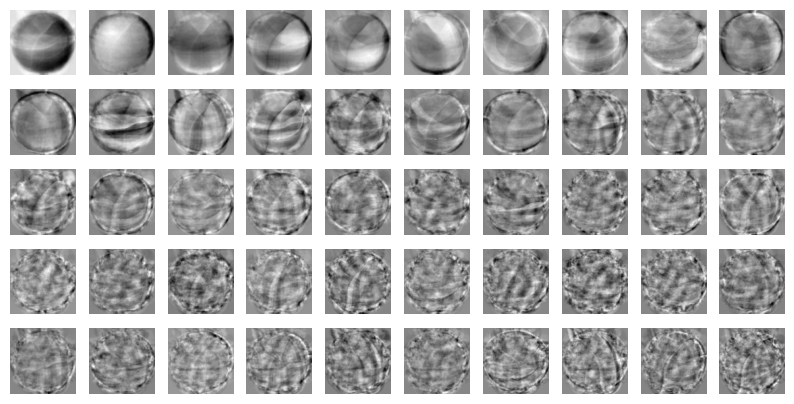

In [16]:

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [17]:
fruits_2d.shape

(300, 10000)

In [18]:
fruits_pca = pca.transform(fruits_2d) # 10000 차원 -> 50 차원
fruits_pca.shape

(300, 50)